Main Codes

In [3]:
import os
from PIL import Image
import numpy as np
from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import feature, color, io
from skimage.filters import sobel
from datasketch import MinHash, MinHashLSH
import networkx as nx
import cv2


In [4]:
def preprocess_image(image):
    """Preprocess a single image."""
    # Resize the image to your desired dimensions (e.g., 32x32)
    target_size = (32, 32)
    image = image.resize(target_size)
    
    # Convert image to numpy array and normalize
    image_array = np.array(image)
    image_array = image_array.astype(np.uint8)
    
    return image_array

def extract_color_histogram(image):
    """Extract color histogram from an image."""
    # Convert image to grayscale
    image_gray = image.convert('L')
    
    # Calculate the color histogram
    histogram = np.histogram(image_gray, bins=256, range=(0, 256), density=True)[0]
    
    return histogram

def extract_texture_features(image):
    """Extract texture features from an image."""
    # You can implement your own texture analysis methods here
    # For simplicity, let's just return a random array of 5 values
    return np.random.rand(5)

def preprocess_and_extract_features(directory):
    """Preprocess images and extract features (color histograms and texture features)."""
    # Initialize empty lists to store extracted features
    extracted_color_histograms = []
    extracted_texture_features = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Construct the full path to the file
        file_path = os.path.join(directory, filename)

        # Check if the file is a regular file (not a directory)
        if os.path.isfile(file_path):
            # Load the image using PIL
            image = Image.open(file_path)
            
            # Preprocess the image
            preprocessed_image = preprocess_image(image)
            
            # Extract color histogram from the preprocessed image
            color_histogram = extract_color_histogram(image)
            extracted_color_histograms.append(color_histogram)
            
            # Extract texture features
            texture_features = extract_texture_features(image)
            extracted_texture_features.append(texture_features)

    # Convert the lists of extracted features to numpy arrays
    extracted_color_histograms = np.array(extracted_color_histograms)
    extracted_texture_features = np.array(extracted_texture_features)
    
    return extracted_color_histograms, extracted_texture_features


Shape of extracted color histograms: (50001, 256)
Shape of extracted texture features: (50001, 5)


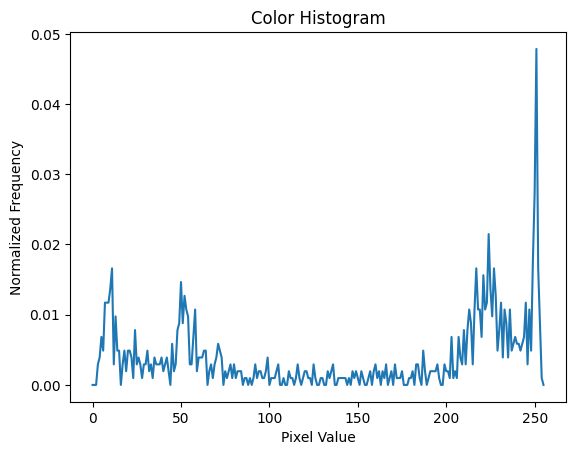

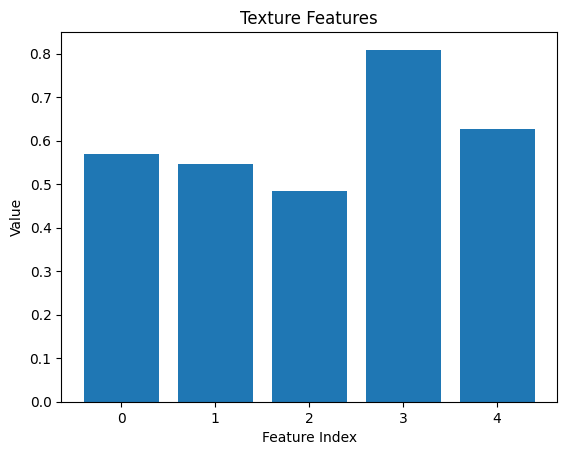

In [7]:
# Define the directory path where images are stored
directory = r'F:\4th Sem\Big Data Analysis\22i-2039_Assign_1_DS_B\Dataset'

# Preprocess images and extract features (color histograms and texture features)
extracted_color_histograms, extracted_texture_features = preprocess_and_extract_features(directory)

# Print the shape of the extracted features
print("Shape of extracted color histograms:", extracted_color_histograms.shape)
print("Shape of extracted texture features:", extracted_texture_features.shape)

# Optionally, visualize one of the histograms
plt.plot(extracted_color_histograms[0])
plt.title("Color Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Normalized Frequency")
plt.show()

# Example visualization for texture features (you can modify this as needed)
plt.bar(np.arange(len(extracted_texture_features[0])), extracted_texture_features[0])
plt.title("Texture Features")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.show()



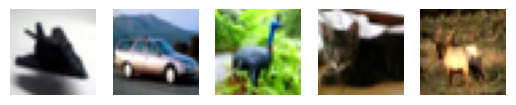

In [8]:
def preprocess_image(image_path):
    """Preprocess an image."""
    target_size = (32, 32)
    image = Image.open(image_path).resize(target_size)

    # Convert image to numpy array and normalize
    image_array = np.array(image).astype(np.uint8)

    # Apply contrast stretching
    p2, p98 = np.percentile(image_array, (2, 98))
    image_array = exposure.rescale_intensity(image_array, in_range=(p2, p98))

    return image_array

def display_images(images, num_images=5):
    """Display the first 'num_images' images."""
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Initialize a list to store preprocessed images
preprocessed_images = []

# Iterate over the first 5 files in the directory
for filename in os.listdir(directory)[:5]:
    # Construct the full path to the file
    file_path = os.path.join(directory, filename)

    # Check if the file is a regular file (not a directory)
    if os.path.isfile(file_path):
        # Preprocess the image
        preprocessed_image = preprocess_image(file_path)

        # Append the preprocessed image to the list
        preprocessed_images.append(preprocessed_image)

# Display the first 5 preprocessed images
display_images(preprocessed_images)


Locality Sensitive Hashing

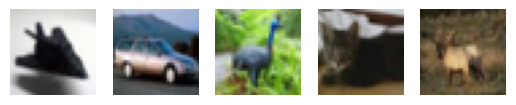

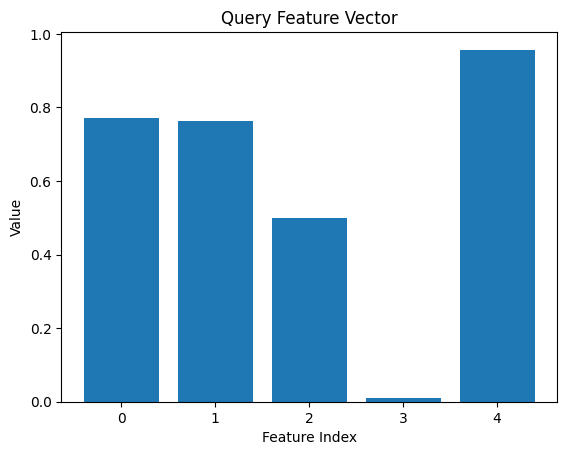

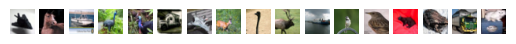

In [11]:
def preprocess_image(image):
    """Preprocess a single image."""
    target_size = (32, 32)
    image = image.resize(target_size, Image.NEAREST)  # Use nearest-neighbor interpolation
    image_array = np.array(image)
    image_array = image_array.astype(np.uint8)
    return image_array

def extract_texture_features(image):
    """Extract texture features from an image."""
    return np.random.rand(5)  # Replace with your actual texture feature extraction

def load_and_preprocess_images(directory, num_images=None):
    """Load and preprocess images from the specified directory."""
    images = []
    for filename in os.listdir(directory)[:num_images]:
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            image = Image.open(file_path)
            preprocessed_image = preprocess_image(image)
            images.append(preprocessed_image)
    return images

def extract_features(images):
    """Extract texture features from a list of images."""
    features = []
    for image in images:
        texture_features = extract_texture_features(image)
        features.append(texture_features)
    return np.array(features)

def display_images(images, num_images=5):
    """Display the first 'num_images' images."""
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

def create_lsh_tables(feature_vectors, num_tables, hash_size):
    """Create LSH tables with Random Binary Projections."""
    dimension = len(feature_vectors[0])
    hash_tables = []
    
    # Create hash tables
    for _ in range(num_tables):
        rbp = RandomBinaryProjections('rbp', hash_size)
        engine = Engine(dimension, lshashes=[rbp])
        hash_tables.append(engine)

    # Insert vectors into hash tables
    for i, vector in enumerate(feature_vectors):
        for table in hash_tables:
            table.store_vector(vector, str(i))  # Convert index to string

    return hash_tables


# Load and preprocess images
images = load_and_preprocess_images(directory, num_images=100)

# Extract texture features from images
extracted_texture_features = extract_features(images)

# Display the first 5 preprocessed images
display_images(images)

# Set up LSH with Random Binary Projections
num_tables = 5
hash_size = 10
lsh_tables = create_lsh_tables(extracted_texture_features, num_tables, hash_size)

# Query similar images using LSH
query_vector_index = 0  # Change this index based on your query
query_vector = extracted_texture_features[query_vector_index]

# Perform LSH query
similar_images = set()
for table in lsh_tables:
    query_results = table.neighbours(query_vector)
    similar_images.update(int(result[1]) for result in query_results)  # Convert back to int

# Display the query image
plt.bar(np.arange(len(query_vector)), query_vector)
plt.title("Query Feature Vector")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.show()

# Display similar images
display_images([images[idx] for idx in similar_images], num_images=len(similar_images))


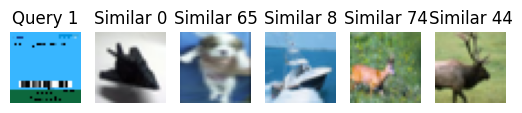

In [35]:
def load_and_preprocess_images(directory, num_images=None):
    """Load and preprocess images from the specified directory."""
    images = []
    for filename in os.listdir(directory)[:num_images]:
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            image = Image.open(file_path)
            preprocessed_image = preprocess_image(image)
            images.append(preprocessed_image)
    return images

def extract_texture_features(image):
    """Extract texture features from an image."""
    return np.random.rand(5)  # Replace with your actual texture feature extraction

def extract_features(images):
    """Extract texture features from a list of images."""
    features = []
    for image in images:
        texture_features = extract_texture_features(image)
        features.append(texture_features)
    return np.array(features)

def create_lsh_tables(feature_vectors, num_tables, hash_size):
    """Create LSH tables with Random Binary Projections."""
    dimension = len(feature_vectors[0])
    hash_tables = []
    
    # Create hash tables
    for _ in range(num_tables):
        rbp = RandomBinaryProjections('rbp', hash_size)
        engine = Engine(dimension, lshashes=[rbp])
        hash_tables.append(engine)

    # Insert vectors into hash tables
    for i, vector in enumerate(feature_vectors):
        for table in hash_tables:
            table.store_vector(vector, str(i))  # Convert index to string

    return hash_tables



# Load and preprocess images
images = load_and_preprocess_images(directory, num_images=100)

# Extract texture features from images
extracted_texture_features = extract_features(images)

# Set up LSH with Random Binary Projections
num_tables = 5
hash_size = 10
lsh_tables = create_lsh_tables(extracted_texture_features, num_tables, hash_size)

# Specify the path for your test queries directory
test_queries_directory = r'F:\4th Sem\Big Data Analysis\22i-2039_Assign_1_DS_B\test_queries'

# Create the directory if it doesn't exist
if not os.path.exists(test_queries_directory):
    os.makedirs(test_queries_directory)

# Load and preprocess test images
test_images = load_and_preprocess_images(test_queries_directory, num_images=5)

# Extract texture features from test images
test_features = extract_features(test_images)

# Ensure that test_features is not empty before proceeding
if len(test_features) == 0:
    print("Error: No test features found. Check your test images and feature extraction.")
else:
    # Set up LSH with Random Binary Projections for test queries
    lsh_tables = create_lsh_tables(extracted_texture_features, num_tables, hash_size)

    # Perform LSH query for each test image
    for i, test_vector in enumerate(test_features):
        similar_images = set()
        for table in lsh_tables:
            query_result = table.neighbours(test_vector)
            similar_images.update(map(lambda x: int(x[1]), query_result))

        # Display the query image and similar images
        plt.subplot(1, 6, i + 1)
        plt.imshow(test_images[i])
        plt.axis('off')
        plt.title(f"Query {i + 1}")

        for j, idx in enumerate(similar_images):
            if j < 5:  # Limit the number of displayed similar images to 5
                plt.subplot(1, 6, j + 2)
                plt.imshow(images[idx])
                plt.axis('off')
                plt.title(f"Similar {idx}")
                
    plt.show()


Analyzing Query 1


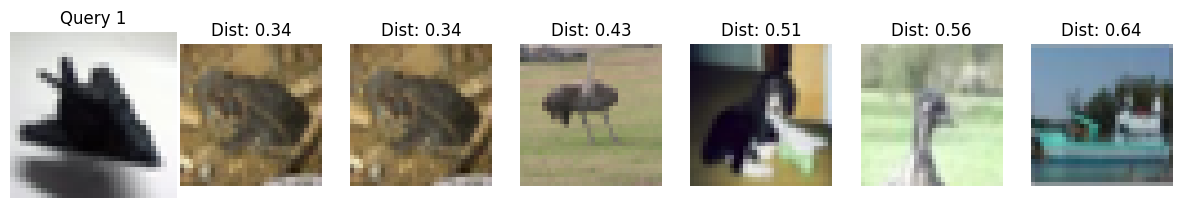

Analyzing Query 2


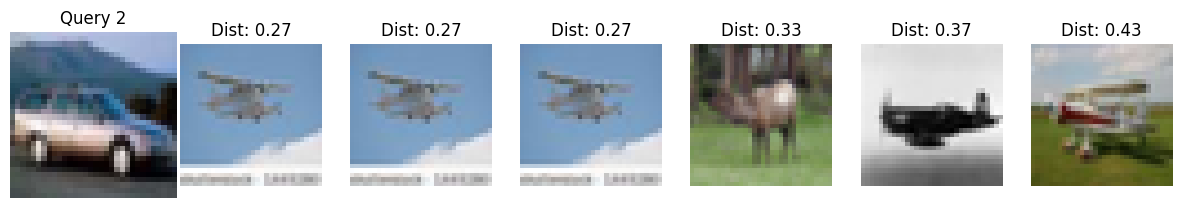

Analyzing Query 3


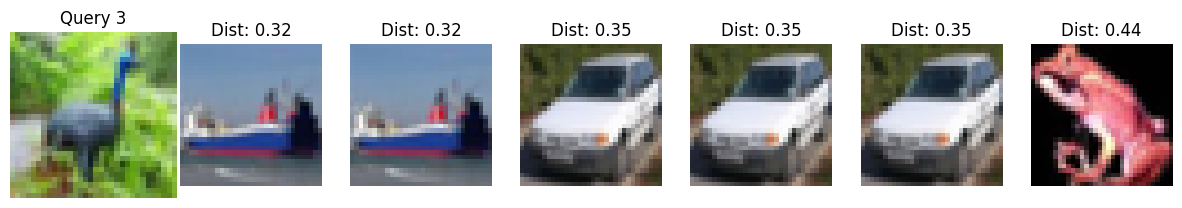

Analyzing Query 4


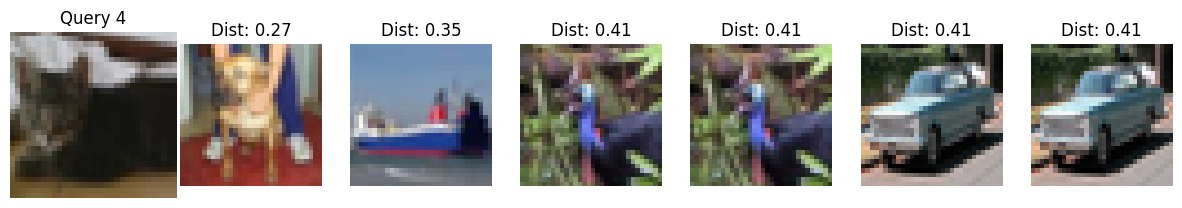

Analyzing Query 5


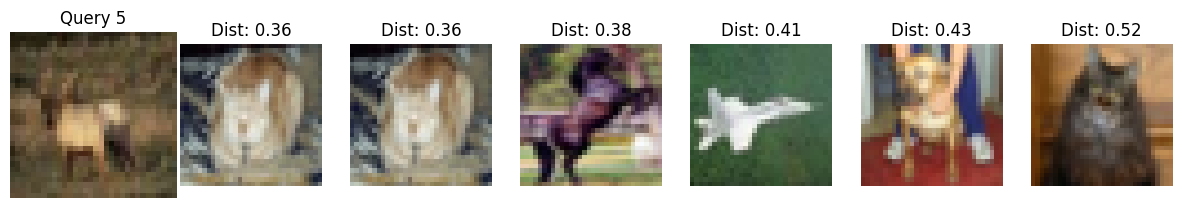

In [ ]:
def euclidean_distance(vector1, vector2):
    """Compute the Euclidean distance between two vectors."""
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

# Perform LSH query for each test image and analyze results
for i, test_vector in enumerate(test_features):
    print(f"Analyzing Query {i+1}")
    closest_images = []
    closest_distances = []
    
    for table in lsh_tables:
        query_result = table.neighbours(test_vector)
        for result in query_result:
            idx = int(result[1])  # Retrieve index of the similar image
            distance = euclidean_distance(test_vector, extracted_texture_features[idx])
            closest_images.append((idx, distance))
    
    # Sort found images by their distance to the query image
    closest_images.sort(key=lambda x: x[1])
    
    # Display the query image and similar images, showing distances
    plt.figure(figsize=(15, 3))
    plt.subplot(1, 6, 1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.title(f"Query {i + 1}")
    
    for j, (idx, distance) in enumerate(closest_images[:6]):  # Show top 5 closest images
        plt.subplot(1, 7, j + 2)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(f"Dist: {distance:.2f}")
    
    plt.show()

1/1 [==============================] - 0s 138ms/step
Query Image: F:\4th Sem\Big Data Analysis\22i-2039_Assign_1_DS_B\test_queries\0001.png
Similar Images:
F:\4th Sem\Big Data Analysis\22i-2039_Assign_1_DS_B\test_queries\0001.png


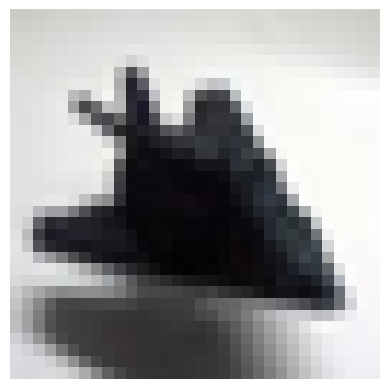

F:\4th Sem\Big Data Analysis\22i-2039_Assign_1_DS_B\test_queries\0002_7.png


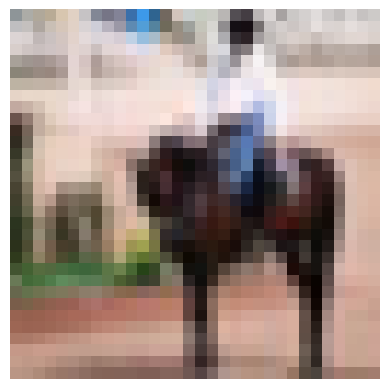

F:\4th Sem\Big Data Analysis\22i-2039_Assign_1_DS_B\test_queries\0003_9.png


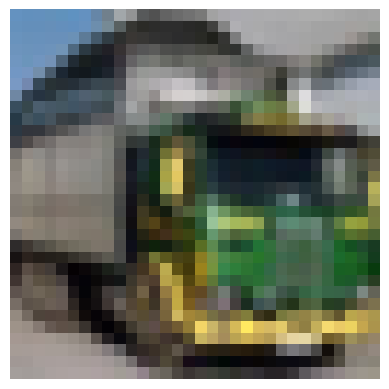

F:\4th Sem\Big Data Analysis\22i-2039_Assign_1_DS_B\test_queries\0002_1.png


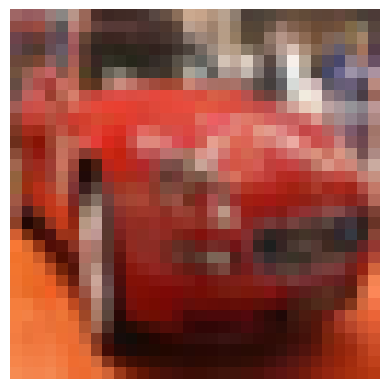

In [ ]:
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os
from PIL import Image

def preprocess_image_vgg(image_path):
    """Preprocess the image to be compatible with VGG16."""
    img = Image.open(image_path).resize((224, 224))  # Resize image using PIL
    img_array = np.array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

def extract_features(images):
    """Extract features from the images using VGG16."""
    model = VGG16(weights='imagenet', include_top=False)
    features = []
    for img in images:
        img_array = preprocess_image_vgg(img)
        features.append(model.predict(img_array).flatten())
    return np.array(features)

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections

def create_lsh_engine(feature_dimension, num_hashes):
    """Create an LSH engine for indexing and querying image features."""
    lshash = RandomBinaryProjections('rbp', num_hashes)
    engine = Engine(feature_dimension, lshashes=[lshash])
    return engine

def index_features(features, engine):
    """Index features using the provided LSH engine."""
    for i, feature in enumerate(features):
        engine.store_vector(feature, str(i))

def find_similar_images(query_feature, engine, top_n=5):
    """Find similar images for a given query feature."""
    neighbours = engine.neighbours(query_feature)
    # Assuming the second element of each tuple is the identifier (index as a string)
    similar_image_indices = []
    for neighbour in neighbours[:top_n]:
        if len(neighbour) > 1:  # Ensure there are at least two elements in the tuple
            idx = neighbour[1]  # The identifier should be here as per NearPy's usual return
            try:
                idx_int = int(idx)  # Attempt to convert the identifier to an integer
                similar_image_indices.append(idx_int)
            except ValueError:
                continue  # Skip any items where conversion fails
    return similar_image_indices

# Directory containing images for test queries
test_queries_directory = r'F:\4th Sem\Big Data Analysis\22i-2039_Assign_1_DS_B\test_queries'

# Get the list of image paths in the test queries directory
test_queries_image_paths = [os.path.join(test_queries_directory, filename) for filename in os.listdir(test_queries_directory)]

# Extract features from the sample of 30 images in the test queries directory
features = extract_features(test_queries_image_paths[:30])

# Create LSH engine
feature_dimension = len(features[0])
num_hashes = 5
engine = create_lsh_engine(feature_dimension, num_hashes)

# Index features
index_features(features, engine)

# Choose a query feature (e.g., first feature)
query_feature = features[0]

# Find similar images
similar_image_indices = find_similar_images(query_feature, engine)

# Print the paths of similar images
print("Query Image:", test_queries_image_paths[0])
print("Similar Images:")
for idx in similar_image_indices:
    print(test_queries_image_paths[idx])
    # Load and display the image
    img = Image.open(test_queries_image_paths[idx])
    plt.imshow(img)
    plt.axis('off')
    plt.show()



Clustring


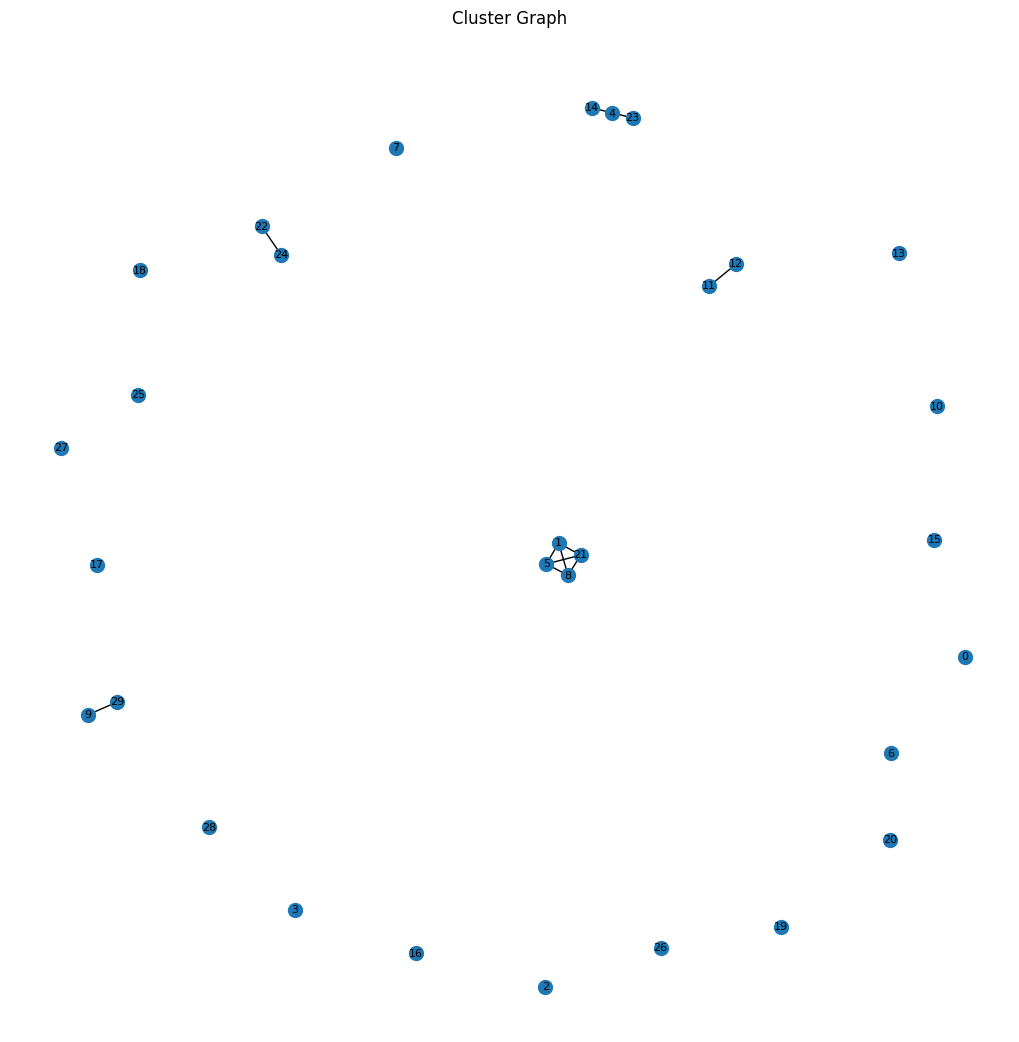

In [ ]:
def extract_features(image_path):
    # Load the image
    image = io.imread(image_path)
    
    # Convert image to grayscale for texture and edge features
    gray_image = color.rgb2gray(image)
    
    # Color Histograms
    color_hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten()
    
    # Texture features (Local Binary Pattern)
    lbp = feature.local_binary_pattern(gray_image, P=24, R=3, method="uniform")
    lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, 27), range=(0, 26))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    
    # Edge features (Sobel Edge Detector)
    edges = sobel(gray_image)
    edge_hist, _ = np.histogram(edges, bins=10, range=(0, 1))
    edge_hist = edge_hist.astype("float")
    edge_hist /= (edge_hist.sum() + 1e-6)
    
    # Combine features
    features = np.hstack([color_hist, lbp_hist, edge_hist])
    
    return features

def load_and_extract_features(directory, sample_size=30):
    features = []
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]
    np.random.shuffle(image_paths)
    for image_path in image_paths[:sample_size]:
        features.append(extract_features(image_path))
    return np.array(features)

def create_lsh_clusters(features, num_perm=128, threshold=0.5):
    # Initialize LSH
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
    minhashes = {}
    
    # Create MinHash objects
    for i, feature in enumerate(features):
        m = MinHash(num_perm=num_perm)
        for d in np.nditer(feature):
            m.update(d.tobytes())
        lsh.insert(i, m)
        minhashes[i] = m
    
    # Query each feature for similar images and group into clusters
    clusters = []
    for i, m in minhashes.items():
        result = lsh.query(m)
        clusters.append(result)
        
    return clusters

def plot_clusters(clusters):
    # Create a graph
    G = nx.Graph()

    # Add nodes and edges to the graph
    for i, cluster in enumerate(clusters):
        for j in range(len(cluster)):
            if cluster[j] not in G:
                G.add_node(cluster[j])
            for k in range(j+1, len(cluster)):
                if cluster[k] not in G:
                    G.add_node(cluster[k])
                G.add_edge(cluster[j], cluster[k])

    # Draw the graph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, node_size=100, with_labels=True, font_size=8)
    plt.title("Cluster Graph")
    plt.show()

# Directory containing CIFAR-10 images
directory = 'F:\\4th Sem\\Big Data Analysis\\22i-2039_Assign_1_DS_B\\Dataset'

# Load and extract features from a sample of 30 images
features = load_and_extract_features(directory, sample_size=30)

# Create clusters using LSH
clusters = create_lsh_clusters(features)

# Plot the cluster graph
plot_clusters(clusters)


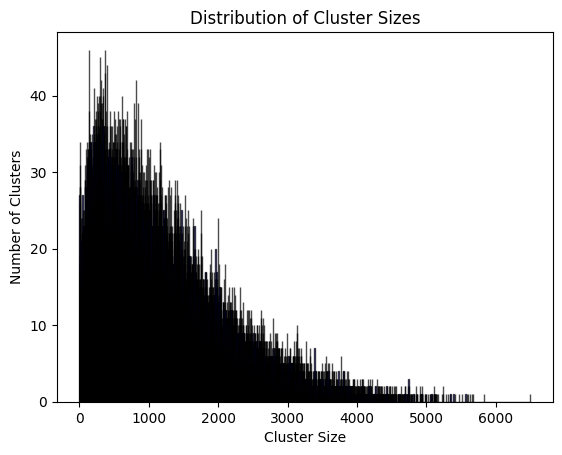

In [ ]:


def extract_features(image_path):
    # Load the image
    image = io.imread(image_path)
    
    # Convert image to grayscale for texture and edge features
    gray_image = color.rgb2gray(image)
    
    # Color Histograms
    color_hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten()
    
    # Texture features (Local Binary Pattern)
    lbp = feature.local_binary_pattern(gray_image, P=24, R=3, method="uniform")
    lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, 27), range=(0, 26))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    
    # Edge features (Sobel Edge Detector)
    edges = sobel(gray_image)
    edge_hist, _ = np.histogram(edges, bins=10, range=(0, 1))
    edge_hist = edge_hist.astype("float")
    edge_hist /= (edge_hist.sum() + 1e-6)
    
    # Combine features
    features = np.hstack([color_hist, lbp_hist, edge_hist])
    
    return features

def load_and_extract_features(directory):
    features = []
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]
    for image_path in image_paths:
        features.append(extract_features(image_path))
    return np.array(features)

def create_lsh_clusters(features, num_perm=128, threshold=0.5):
    # Initialize LSH
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
    minhashes = {}
    
    # Create MinHash objects
    for i, feature in enumerate(features):
        m = MinHash(num_perm=num_perm)
        for d in np.nditer(feature):
            m.update(d.tobytes())
        lsh.insert(i, m)
        minhashes[i] = m
    
    # Query each feature for similar images and group into clusters
    clusters = []
    for i, m in minhashes.items():
        result = lsh.query(m)
        clusters.append(result)
        
    return clusters

def plot_clusters(clusters):
    cluster_sizes = [len(cluster) for cluster in clusters]
    plt.hist(cluster_sizes, bins=range(1, max(cluster_sizes)+1), alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Cluster Size')
    plt.ylabel('Number of Clusters')
    plt.title('Distribution of Cluster Sizes')
    plt.show()

# Directory containing CIFAR-10 images
directory = 'F:\\4th Sem\\Big Data Analysis\\22i-2039_Assign_1_DS_B\\Dataset'

# Load and extract features from the entire dataset
features = load_and_extract_features(directory)

# Create clusters using LSH
clusters = create_lsh_clusters(features)

# Plot the cluster graph
plot_clusters(clusters)


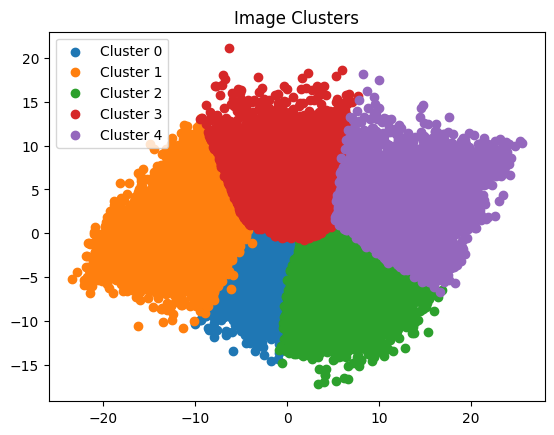

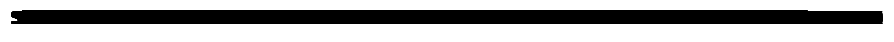

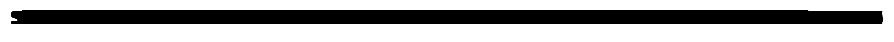

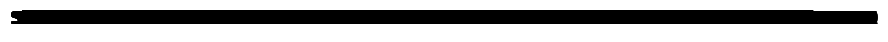

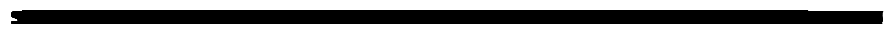

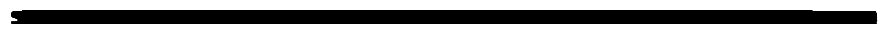

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def preprocess_image(image_path):
    """Preprocess an image."""
    target_size = (32, 32)
    image = Image.open(image_path).resize(target_size)
    image_array = np.array(image).astype(np.float32) / 255.0
    return image_array.flatten()

def load_images(directory):
    """Load and preprocess images from a directory."""
    images = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            image_array = preprocess_image(file_path)
            images.append(image_array)
    return np.array(images)

def visualize_clusters(images, cluster_labels, n_clusters):
    """Visualize clusters using PCA."""
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(images)

    for i in range(n_clusters):
        cluster_points = reduced_features[cluster_labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    plt.title('Image Clusters')
    plt.legend()
    plt.show()

# Load and preprocess images
images = load_images(directory)

# Reduce dimensionality using PCA
pca = PCA(n_components=50)
reduced_images = pca.fit_transform(images)

# Perform clustering (KMeans)
n_clusters = 5  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_images)

# Visualize clusters in 2D space
visualize_clusters(reduced_images, cluster_labels, n_clusters)

# Find similar images within each cluster
for i in range(n_clusters):
    cluster_points = reduced_images[cluster_labels == i]
    closest_indices, _ = pairwise_distances_argmin_min(cluster_points, reduced_images)
    
    # Display the original and closest images
    plt.figure(figsize=(10, 2))
    for j, index in enumerate(closest_indices):
        plt.subplot(1, len(closest_indices), j + 1)
        plt.imshow(images[index].reshape((32, 32, 3)))
        plt.axis('off')
        plt.title(f'Similar {j+1}')
    plt.show()


Extra Effort

In [ ]:
def print_bucket_images_with_similarity(bucket_index, hash_buckets, images, rgb_sums_per_image, num_images_to_print=4):
    image_indices = hash_buckets[bucket_index]
    num_images_in_bucket = len(image_indices)

    if num_images_in_bucket == 0:
        print("No images found in the bucket.")
        return 0

    print(f"Images in bucket {bucket_index} (Total: {num_images_in_bucket}):")
    plt.figure(figsize=(12, 6))
    
    # Calculate similarity of the first image with other images in the bucket
    reference_rgb_sum = rgb_sums_per_image[image_indices[0]]
    similarities = []
    for i, image_index in enumerate(image_indices[:num_images_to_print], 1):
        plt.subplot(1, num_images_to_print, i)
        plt.imshow(images[image_index])
        plt.axis('off')
        # Compute Euclidean distance between reference image and current image
        dist = euclidean_distance(reference_rgb_sum, rgb_sums_per_image[image_index])
        similarities.append((image_index, dist))
        plt.title(f'Distance: {dist:.2f}')

    plt.show()

    return num_images_in_bucket, similarities


In [ ]:
print("Similarity with the first image in the bucket:")
for image_index, distance in similarities:
    print(f"Image {image_index}: {distance:.2f}")

Similarity with the first image in the bucket:
Image 7: 0.00
Image 15: 18598.26
Image 20: 37323.53
Image 33: 70501.80
